MSE :  4973274832.886891
Root Mean Square Error (RMSE): 70521.45
R² Score (Accuracy): -40498.16 %

Model Test Results:

 X_test (sq.ft)  y_test (Actual Price)  y_pred (Predicted Price)
           1425                 319000                 235246.09
           1600                 312000                 257853.60


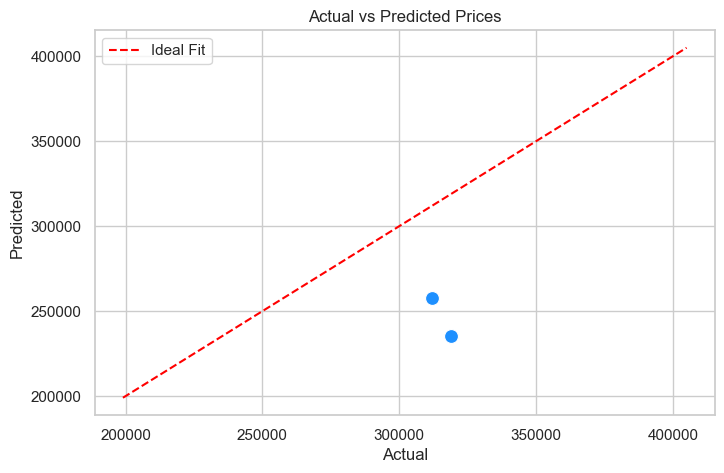

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# Sample data (e.g., house size vs. house price)
X = np.array([[1400], [1600], [1700], [1875], [1100], [1550], [2350], [2450], [1425], [1700]])
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print ("MSE : ", mse)
rmse = np.sqrt(mse)

# Print RMSE
print("Root Mean Square Error (RMSE):", round(rmse, 2))

#r2 square value
r2 = r2_score(y_test, y_pred)
print("R² Score (Accuracy):", round(r2 * 100, 2), "%")


# Display test inputs and outputs
results = pd.DataFrame({
    "X_test (sq.ft)": X_test.flatten(),
    "y_test (Actual Price)": y_test,
    "y_pred (Predicted Price)": y_pred.round(2)
})

print("\nModel Test Results:\n")
print(results.to_string(index=False))


# For displaying plots inline
%matplotlib inline

# Optional: set Seaborn style
sns.set(style="whitegrid")

# Create DataFrame for seaborn
df_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_results, x="Actual", y="Predicted", s=100, color="dodgerblue")
sns.lineplot(x=[y.min(), y.max()], y=[y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()





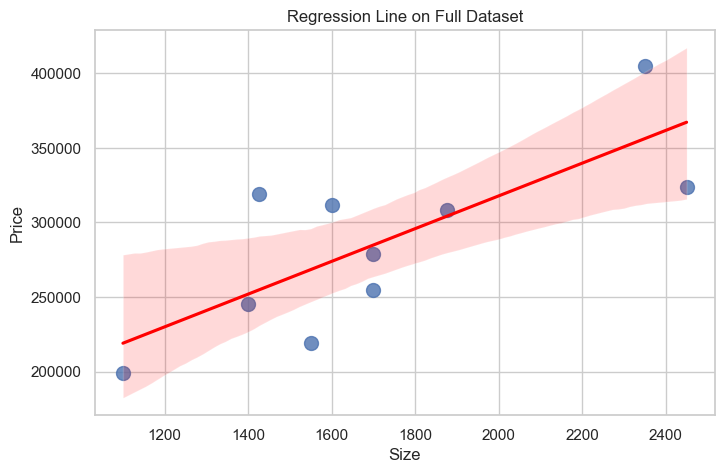

In [2]:
# Combine training and test for overall regression line
df_all = pd.DataFrame({
    "Size": X.flatten(),
    "Price": y
})

plt.figure(figsize=(8, 5))
sns.regplot(data=df_all, x="Size", y="Price", scatter_kws={"s": 100}, line_kws={"color": "red"})
plt.title("Regression Line on Full Dataset")
plt.show()

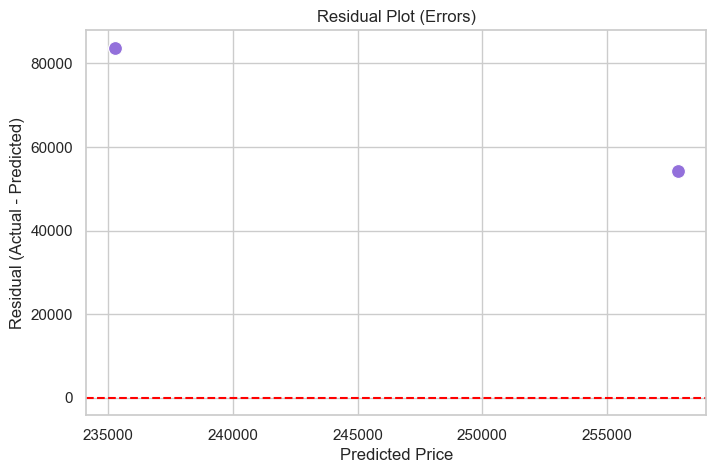

In [3]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, s=100, color="mediumpurple")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot (Errors)")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()
